In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import scipy as sp
import daft

import matplotlib.pyplot as plt
import numpy as np

from abtools.bayesian import BernoulliABModel
from abtools.frequentist import PermutationTest, ZTest, TTest

%matplotlib inline
#plt.xkcd()

In [4]:
p = .05
size = 200000
delta_true = .025

a = sp.stats.bernoulli.rvs(p=p, size=size, random_state=8228)
b = sp.stats.bernoulli.rvs(p=p*(1+delta_true), size=size, random_state=8228)

print('A - Mean: %.4f, std: %.2f' % (a.mean(), a.std()))
print('B - Mean: %.4f, std: %.2f' % (b.mean(), b.std()))
print('B better A on %.4f = %.4f%%' % (b.mean()- a.mean(), (b.mean()/a.mean()-1)*100))

A - Mean: 0.0502, std: 0.22
B - Mean: 0.0513, std: 0.22
B better A on 0.0011 = 2.2917%


In [5]:
model = BernoulliABModel(a, b)
model.fit()

INFO (theano.gof.compilelock): Waiting for existing lock by process '25378' (I am process '19997')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/ivba/.theano/compiledir_Linux-4.10--generic-x86_64-with-Ubuntu-17.04-zesty-x86_64-3.5.3-64/lock_dir


         Current function value: 80297.622360
         Iterations: 15
         Function evaluations: 80
         Gradient evaluations: 70


100%|██████████| 10000/10000 [00:31<00:00, 316.92it/s]


In [6]:
model.summary()

,mean,sd,mc_error,hpd_2.5,hpd_97.5
$p_A$,0.050182,0.000479,0.000012,0.049249,0.051140
$p_B$,0.051310,0.000491,0.000013,0.050365,0.052291
$A_{\sigma^2}$,0.047663,0.000431,0.000011,0.046823,0.048525
$B_{\sigma^2}$,0.048677,0.000440,0.000012,0.047829,0.049557
$\Delta_p$,0.001129,0.000674,0.000018,-0.000286,0.002372
$\Delta_{\sigma}$,0.002310,0.001380,0.000037,-0.000584,0.004852
Effect size,0.005142,0.003072,0.000083,-0.001304,0.010799


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e34adf470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e33424c18>], dtype=object)

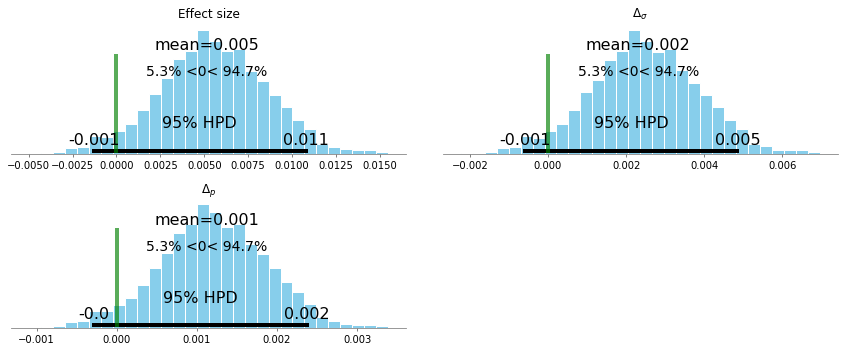

In [7]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e333678d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e318c6dd8>], dtype=object)

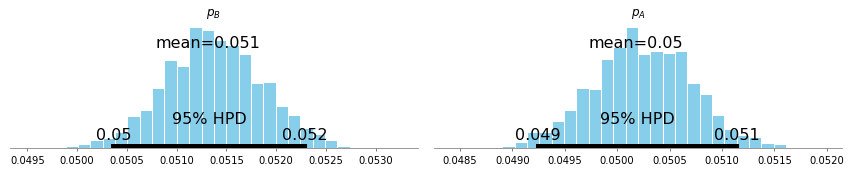

In [8]:
model.plot_params()